In [ ]:
import pandas as pd
import numpy as np
import csv
import copy
from collections import defaultdict

In [67]:
#Import all the data

#Households data
ownership_info_big_data = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/survey_vehicles.csv', encoding = "ISO-8859-1")

#Vehicle trip data
vgps_trips_big_data = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/v_gpstrips.csv', encoding = "ISO-8859-1")


In [68]:
ownership_info_big_data.head()

,sampno,vehno,veh_type,model_year,veh_make,veh_make_other,veh_model,veh_series,veh_series_other,body_type,...,ownership_other,insurance,obd_device,vehicle_used,why_no_travel,why_no_travel_other,hhwgt,exphhwgt,geom,epa_id
0,7156986,2,2,2009,51,NaN,REDACTED,REDACTED,REDACTED,1,...,NaN,NaN,NaN,1,NaN,NaN,2.304210,675.182099,REDACTED,16776.0
1,7156986,3,2,2000,17,NaN,REDACTED,REDACTED,REDACTED,8,...,NaN,NaN,NaN,2,2.0,NaN,2.304210,675.182099,REDACTED,NaN
2,7157693,1,2,2012,20,NaN,REDACTED,REDACTED,REDACTED,6,...,NaN,NaN,NaN,1,NaN,NaN,0.606680,177.770223,REDACTED,23268.0
3,7158808,1,2,2003,13,NaN,REDACTED,REDACTED,REDACTED,1,...,NaN,NaN,NaN,1,NaN,NaN,0.923009,270.461039,REDACTED,NaN
4,7158808,2,2,1992,13,NaN,REDACTED,REDACTED,REDACTED,1,...,NaN,NaN,NaN,2,1.0,NaN,0.923009,270.461039,REDACTED,NaN


In [69]:
ownership_info = ownership_info_big_data[['sampno', 'vehno', 'ownership']]
ownership_info

,sampno,vehno,ownership
0,7156986,2,1
1,7156986,3,1
2,7157693,1,2
3,7158808,1,1
4,7158808,2,1
5,7158870,1,1
6,7158870,2,1
7,7159089,1,1
8,7159089,2,1
9,7160186,1,2


In [25]:
vgps_trips_big_data.head()

,sampno,vehno,gpstripid,gpstravdayid,gpstravdaytripid,start_time,end_time,duration_min,distance_miles,avg_speed_mph,...,destination_distfromlast,gaptime,tripareatype,workrelated,nontransport,onsite,looptrip,origin_loc_type,destination_loc_type,geom
0,1776019,2,28,7,2,2012-09-24 07:51:23,2012-09-24 07:58:04,6.679999,2.092600,18.790000,...,15.583990,342.42,1,0,0,0,0,SCHOOL,HOME,REDACTED
1,2759536,2,13,3,7,2012-12-09 20:58:43,2012-12-09 21:23:58,25.250000,18.784500,44.639999,...,36.801053,876.32,1,0,0,0,0,OTHER,HOME,REDACTED
2,2055542,1,14,6,1,2012-07-24 08:49:38,2012-07-24 08:50:32,0.899999,0.169699,11.310000,...,93.900105,4.82,1,0,0,0,0,HOME,HOME,REDACTED
3,2556033,1,4,1,4,2012-10-12 16:56:04,2012-10-12 17:18:15,22.180000,10.090700,27.290000,...,18.910548,1098.68,1,0,0,0,0,OTHER,HOME,REDACTED
4,2759536,1,9,5,5,2012-12-11 17:44:06,2012-12-11 18:12:42,28.600000,14.154700,29.700000,...,39.548270,875.88,1,0,0,0,0,OTHER,HOME,REDACTED


In [27]:
vgps_trips = vgps_trips_big_data[['sampno', 'vehno']]
vgps_trips.head(10)

,sampno,vehno
0,1776019,2
1,2759536,2
2,2055542,1
3,2556033,1
4,2759536,1
5,2577440,1
6,1318928,1
7,2959995,2
8,1120935,1
9,3052193,3


In [46]:
# Now that you have the data 

In [ ]:
#Test

In [49]:
d = defaultdict(lambda: defaultdict(int))
d

defaultdict(<function __main__.<lambda>()>, {})

In [32]:
test = ownership_info.head(5)
test

,sampno,vehno,ownership
0,7156986,2,1
1,7156986,3,1
2,7157693,1,2
3,7158808,1,1
4,7158808,2,1


In [73]:
for r in test.values:
    s = r[0]
    v = r[1]
    o = r[2]
    d[s][v] = o

In [74]:
d

defaultdict(<function __main__.<lambda>()>,
            {7156986: defaultdict(int, {2: 1, 3: 1}),
             7157693: defaultdict(int, {1: 2}),
             7158808: defaultdict(int, {1: 1, 2: 1})})

In [64]:
#Now do

In [70]:
ownership_dict = defaultdict(lambda: defaultdict(int))
ownership_dict

defaultdict(<function __main__.<lambda>()>, {})

In [79]:
f = defaultdict(lambda: defaultdict(int))
f

defaultdict(<function __main__.<lambda>()>, {})

In [80]:
for row in ownership_info.values:
    sampno = row[0]
    vehno = row[1]
    ownership = row[2]
    
    f[sampno][vehno] = ownership
    
f
    

defaultdict(<function __main__.<lambda>()>,
            {7156986: defaultdict(int, {2: 1, 3: 1, 1: 1}),
             7157693: defaultdict(int, {1: 2}),
             7158808: defaultdict(int, {1: 1, 2: 1}),
             7158870: defaultdict(int, {1: 1, 2: 1}),
             7159089: defaultdict(int, {1: 1, 2: 1}),
             7160186: defaultdict(int, {1: 2, 2: 2}),
             7163193: defaultdict(int, {1: 1, 2: 1}),
             7163480: defaultdict(int, {1: 1, 2: 1}),
             7163555: defaultdict(int, {1: 1}),
             7163889: defaultdict(int, {1: 1, 2: 1, 3: 1, 4: 1}),
             7164822: defaultdict(int, {1: 1, 2: 1}),
             7165540: defaultdict(int, {1: 1, 2: 1}),
             7168791: defaultdict(int, {1: 1, 2: 1, 3: 1}),
             7168963: defaultdict(int, {1: 1, 2: 1, 3: 1}),
             7169214: defaultdict(int, {1: 1, 2: 1}),
             7169686: defaultdict(int, {1: 1, 2: 1, 3: 1}),
             7169816: defaultdict(int, {1: 1, 2: 1, 3: 1}),
        

In [85]:
count = defaultdict(int)

In [86]:
for trip in vgps_trips.values:
    trip_sampno = trip[0]
    trip_vehno = trip[1]
    
    trip_ownership_x = f[trip_sampno][trip_vehno]
    
    if count[trip_ownership_x] == 0:
        count[trip_ownership_x] = 1
        
    elif count[trip_ownership_x] != 0:
        count[trip_ownership_x] += 1
        

In [87]:
count

defaultdict(int, {1: 17821, 4: 125, 2: 794, 0: 82, 3: 228, 7: 25})

In [89]:
#turn a dictionary into a dataframe
count_df = pd.DataFrame(list(count.items()), columns=['ownership', 'count'])
count_df

,ownership,count
0,1,17821
1,4,125
2,2,794
3,0,82
4,3,228
5,7,25


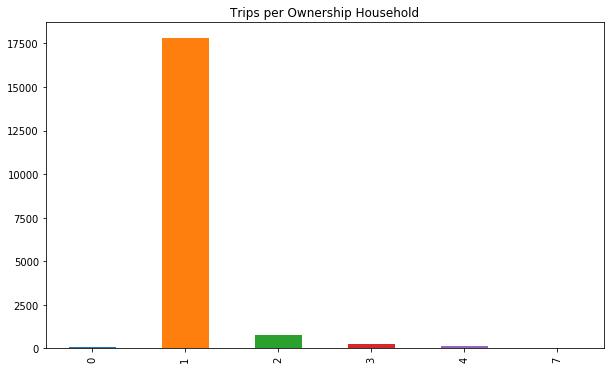

In [93]:
#build the Series
trip_counts_Series = pd.Series([82,17821,794,228,125,25], index= ['0','1','2','3','4','7'])

#build the plot from "trip_counts_Series"
trip_count_plot = trip_counts_Series.plot(kind='bar', title="Trips per Ownership Household", figsize=(10,6))

